# **Importing Required Libraries**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

In [4]:
base_data = pd.read_csv("insurance.csv")

df = base_data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


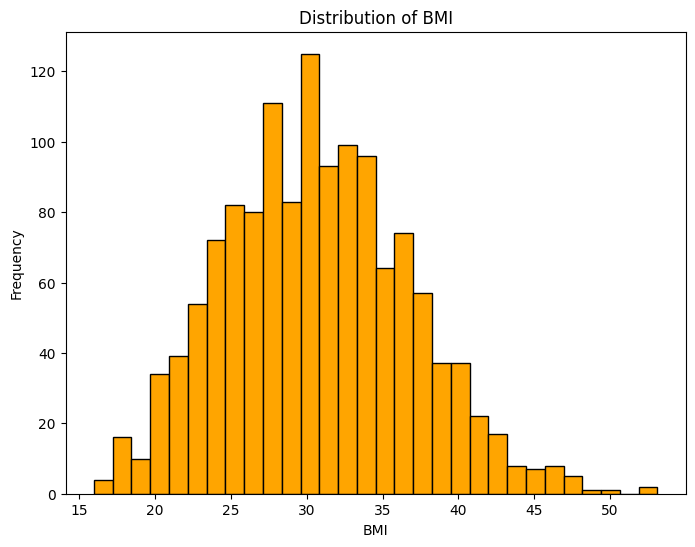

In [5]:
#Question: Examine the distribution of Bmi (Body Mass Index)

# Create a histogram of the BMI distribution
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

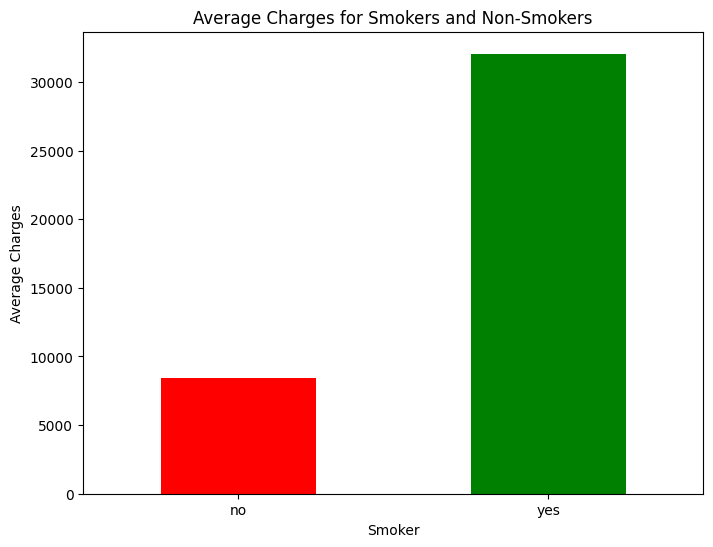

In [6]:
#Question: Examine the relationship between “smoker” and “charges”

# Group data by smoker and calculate mean charges
smoker_charges = df.groupby('smoker')['charges'].mean()

# Plotting
plt.figure(figsize=(8, 6))
smoker_charges.plot(kind='bar', color=['red', 'green'])
plt.title('Average Charges for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

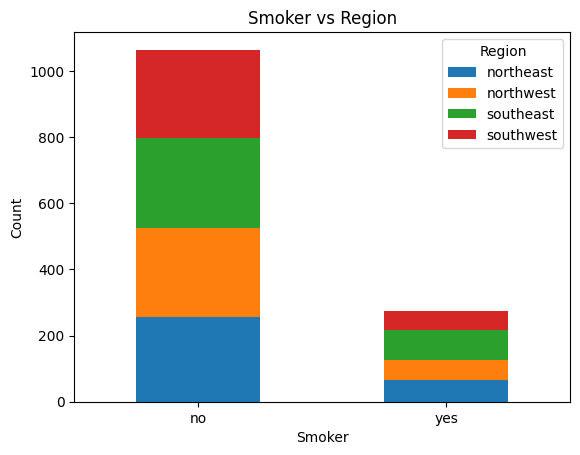

In [7]:
#Question: Examine the relationship between “smoker” and “region”.

# Create a cross-tabulation (crosstab) of smoker and region
smoker_region_crosstab = pd.crosstab(df['smoker'], df['region'])

# Plotting
plt.figure(figsize=(8, 6))
smoker_region_crosstab.plot(kind='bar', stacked=True)
plt.title('Smoker vs Region')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()

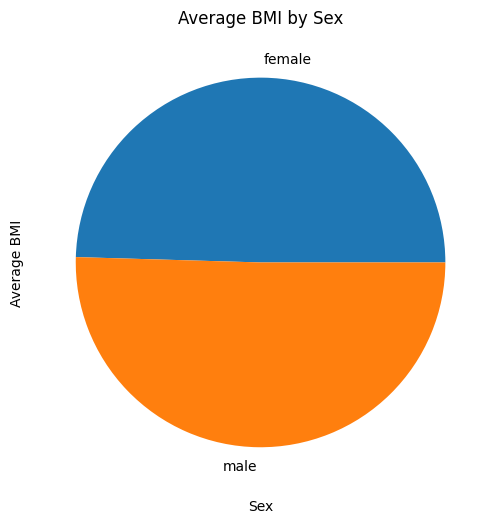

In [8]:
#Question: Examine the relationship between “bmi” and “sex”.

# Group data by sex and calculate mean BMI
sex_bmi_mean = df.groupby('sex')['bmi'].mean()

# Plotting
plt.figure(figsize=(8, 6))
sex_bmi_mean.plot(kind='pie')
plt.title('Average BMI by Sex')
plt.xlabel('Sex')
plt.ylabel('Average BMI')
plt.xticks(rotation=0)
plt.show()

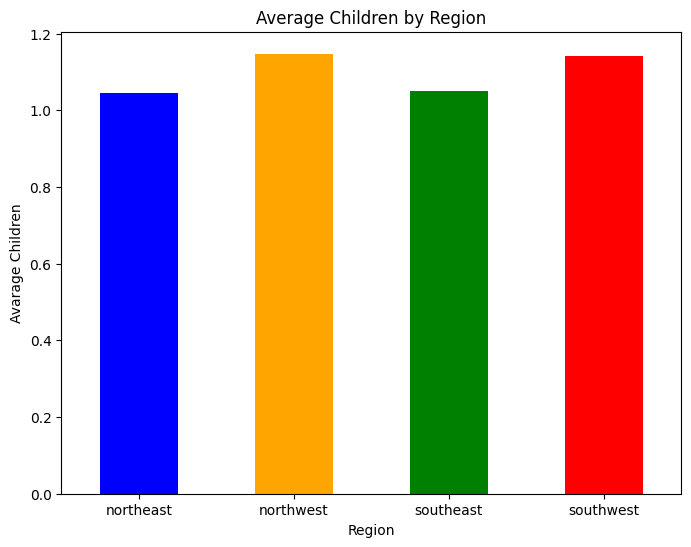

In [9]:
#Question: Find the "region" with the most "children".

# Group data by sex and calculate mean BMI
sex_bmi_mean = df.groupby('region')['children'].mean()

# Plotting
plt.figure(figsize=(8, 6))
sex_bmi_mean.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Average Children by Region')
plt.xlabel('Region')
plt.ylabel('Avarage Children')
plt.xticks(rotation=0)
plt.show()

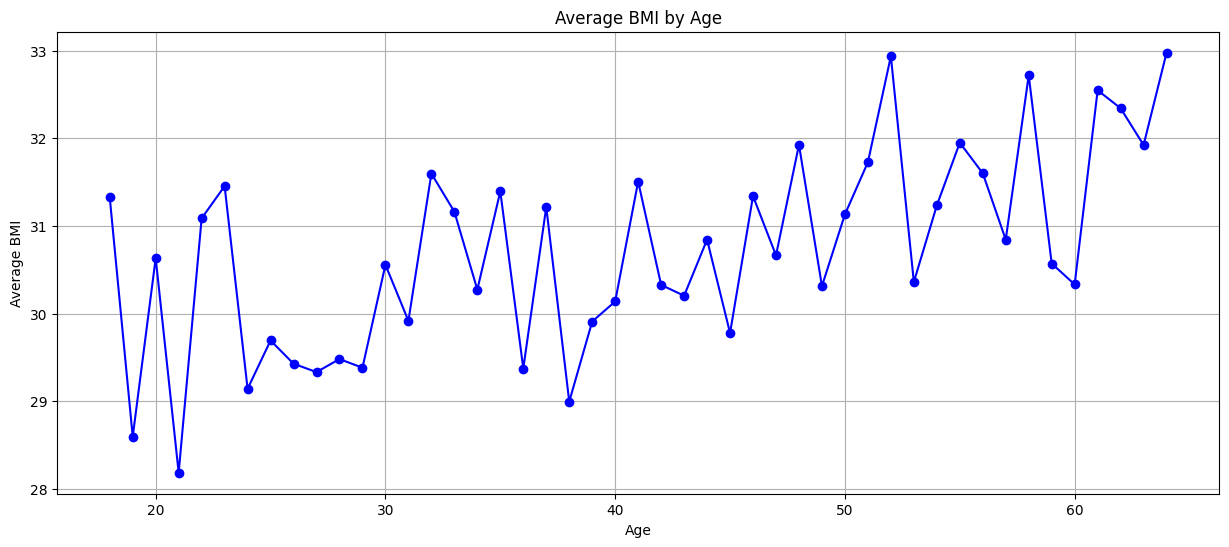

In [10]:
#Question: Examine the relationship between “age” and “bmi”.

# Calculate the average BMI for different age groups
age_bmi_mean = df.groupby('age')['bmi'].mean()

# Line plot of average BMI by age
plt.figure(figsize=(15, 6))
age_bmi_mean.plot(kind='line', marker='o', color='blue')
plt.title('Average BMI by Age')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()

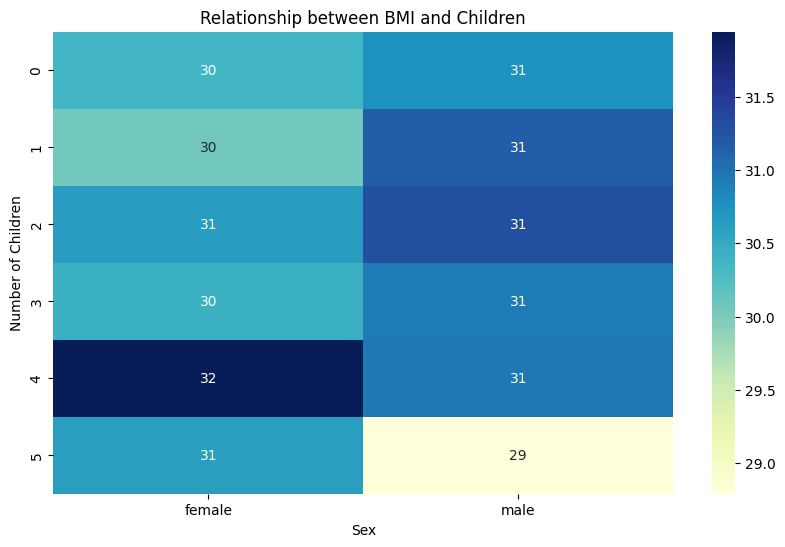

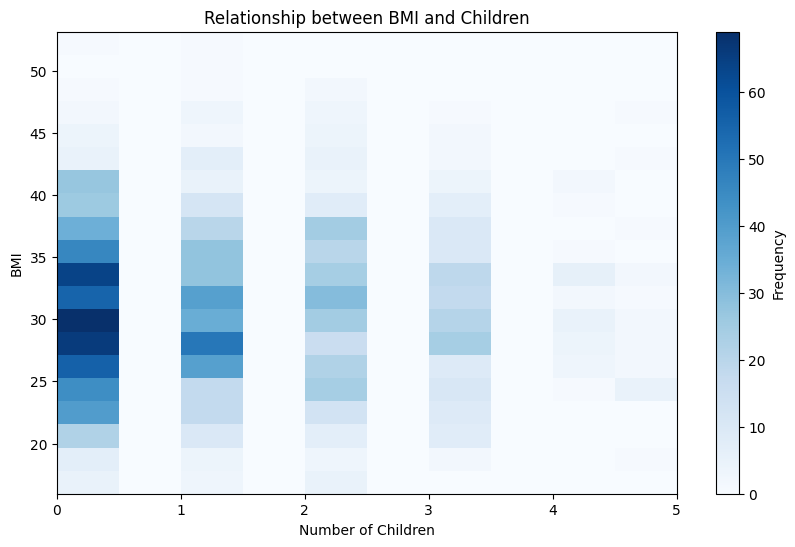

In [11]:
#Question: Examine the relationship between “bmi” and “children”.

# Create a heatmap
heatmap_data = df.pivot_table(values="bmi", index="children", columns="sex", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Relationship between BMI and Children")
plt.xlabel("Sex")
plt.ylabel("Number of Children")
plt.show()

# Create a 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(df["children"], df["bmi"], bins=(10, 20), cmap="Blues")
plt.title("Relationship between BMI and Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.colorbar(label="Frequency")
plt.show()

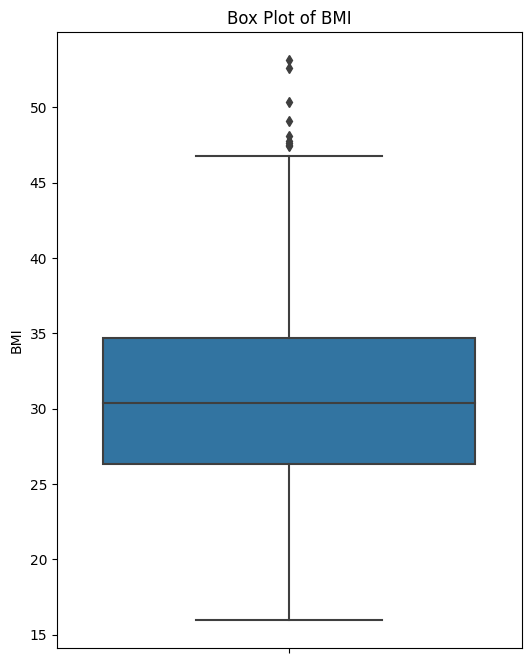

Potential outliers: 9
      age     sex    bmi  children smoker     region      charges
1317   18    male  53.13         0     no  southeast   1163.46270
1047   22    male  52.58         1    yes  southeast  44501.39820
847    23    male  50.38         1     no  southeast   2438.05520
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
1088   52    male  47.74         1     no  southeast   9748.91060
860    37  female  47.60         2    yes  southwest  46113.51100
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801


In [12]:
#Question: Is there an outlier in the "bmi" variable? Please review.

# Create a box plot for "bmi"
plt.figure(figsize=(6, 8))
sns.boxplot(y=df["bmi"])
plt.title("Box Plot of BMI")
plt.ylabel("BMI")
plt.show()

# Calculate the IQR for "bmi"
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]

print("Potential outliers:", len(outliers))
print(outliers.sort_values("bmi", ascending=False))

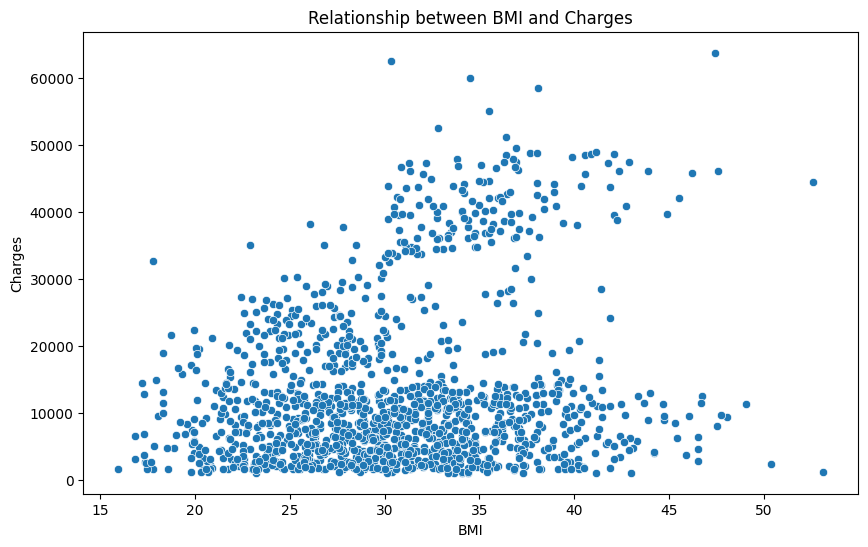

In [13]:
#Questiion: Examine the relationship between “bmi” and “charges”

plt.figure(figsize=(10, 6))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


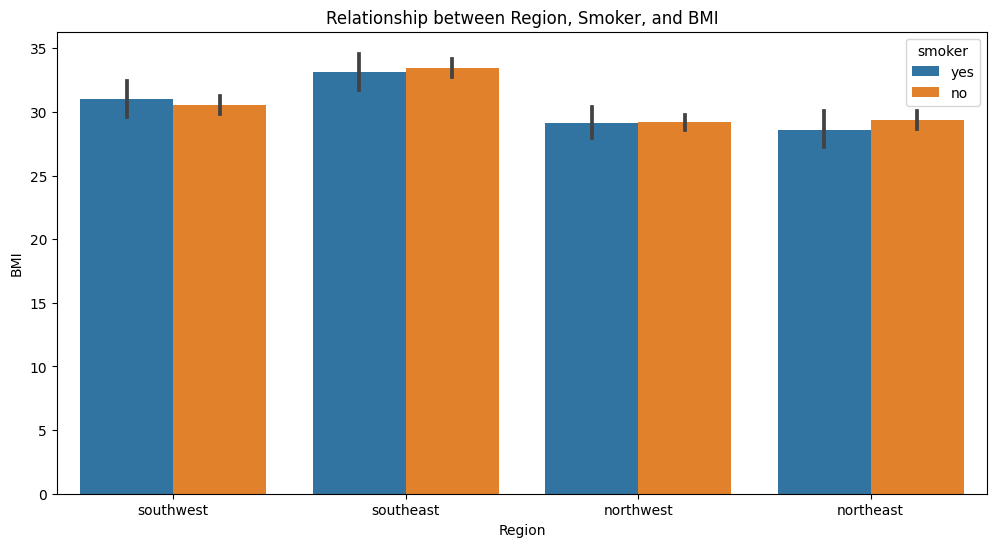

In [14]:
#Question: Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

plt.figure(figsize=(12, 6))
sns.barplot(x="region", y="bmi", hue="smoker", data=df)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.show()

# **Data Preprocessing**

In [15]:
base_data = pd.read_csv("insurance.csv")

df = base_data.copy()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Prepare features and target variable
X = df.drop(columns=['charges'])
y = df['charges']

In [17]:
# Perform Label Encoding for categorical variables
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])
X['region'] = label_encoder.fit_transform(X['region'])

In [18]:
# Perform One-Hot Encoding for the 'region' column
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
region_encoded = onehot_encoder.fit_transform(X[['region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=['region_1', 'region_2', 'region_3'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
X = pd.concat([X, region_encoded_df], axis=1)
X = X.drop(columns=['region'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the dataset using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Selection**

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    SVR()
]

In [21]:
# Evaluate models using cross-validation
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = np.mean(rmse_scores)
    print(f"{model.__class__.__name__}: Mean RMSE = {mean_rmse:.2f}")

LinearRegression: Mean RMSE = 6147.09
Ridge: Mean RMSE = 6147.00
Lasso: Mean RMSE = 6146.99
RandomForestRegressor: Mean RMSE = 5006.40
SVR: Mean RMSE = 12566.80


In [22]:
# Choose the best performing model based on cross-validation
best_model = min(models, key=lambda model: np.mean(np.sqrt(-cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'))))

print(f"Best Model: {best_model.__class__.__name__}")

Best Model: RandomForestRegressor


# **Hyper-parameter Optimization**

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [24]:
# Create the GridSearchCV object
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


# **Model Evaluation**

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

In [27]:
# Calculate regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

In [28]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Median Absolute Error:", median_ae)
print("Explained Variance Score:", explained_var)

Mean Squared Error: 19081300.01431333
Mean Absolute Error: 2477.3411422935287
R-squared Score: 0.8770920713427894
Median Absolute Error: 1488.458130035801
Explained Variance Score: 0.8777671464345178
